In [1]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.stats import sigma_clip
import lightkurve as lk
from lightkurve import SFFCorrector
import astropy.units as u
from astropy import stats
import time as datetime
from lightkurve import periodogram
from astropy.convolution import Box1DKernel, convolve
from tqdm import tqdm_notebook as tqdm
import numpy.linalg as lin
import scipy.linalg as sclin

from scipy import ndimage as nd
import re
plt.rcParams.update({'figure.max_open_warning': 0})
import warnings
warnings.filterwarnings("ignore")

#Import all needed packages 

In [2]:
cd /Users/hamil/Documents/TESSFiles 

C:\Users\hamil\Documents\TESSFiles


In [112]:
cand1 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand2 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand3 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand4 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand5 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand6 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand7 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand8 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand9 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand10 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand11 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand12 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand13 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00370324073-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand14 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand15 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand16 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand17 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand18 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand19 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand20 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179985566-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand21 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00270411008-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand22 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand23 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')

Filename: /Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  LIGHTCURVE    1 BinTableHDU     88   1282R x 14C   [D, E, J, D, D, D, D, D, J, J, D, D, D, D]   
  2  SUMIMAGE      1 ImageHDU        87   (15, 15)   float64   
  3  APERTURE      1 ImageHDU        87   (15, 15)   int32   


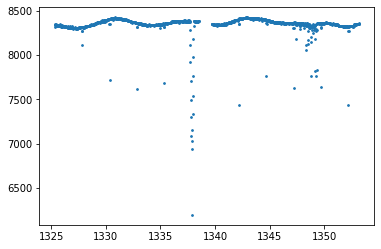

In [113]:
hdul1 = fits.open(cand1)

hdul1.info()
hdul1[0].header
hdul1[2].header
dataset = hdul1[1].data
flux1 = dataset['FLUX_RAW']
flux1_err = dataset['FLUX_RAW_ERR']
fluxbkg = dataset['FLUX_BKG']
time1 = dataset['TIME']
sect = hdul1[0].header['SECTOR']
camera = hdul1[0].header['CAMERA']
CCD = hdul1[0].header['CCD']
aperture = hdul1[3].data
quad = dataset['QUALITY']
pix_quad = dataset['PIXEL_QUALITY']
cado = dataset['CADENCENO']
newflux = flux1 - flux2
plt.scatter(time1,flux1, s=3)
plt.show()

In [114]:
hdul1[1].columns.names

['TIME',
 'TIMECORR',
 'CADENCENO',
 'FLUX_RAW',
 'FLUX_RAW_ERR',
 'FLUX_BKG',
 'FLUX_CORR',
 'FLUX_CORR_ERR',
 'QUALITY',
 'PIXEL_QUALITY',
 'MOM_CENTR1',
 'MOM_CENTR2',
 'POS_CORR1',
 'POS_CORR2']

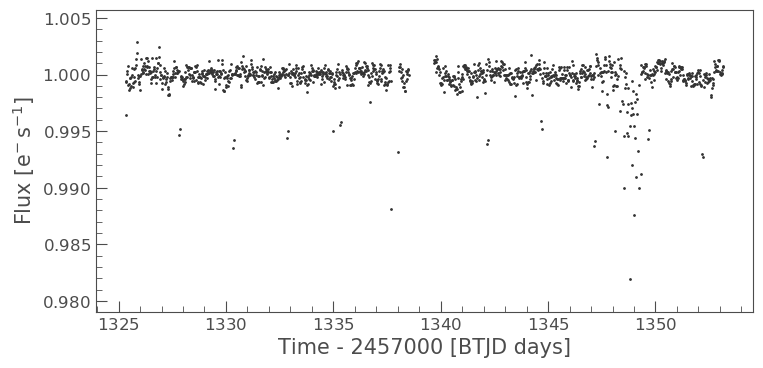

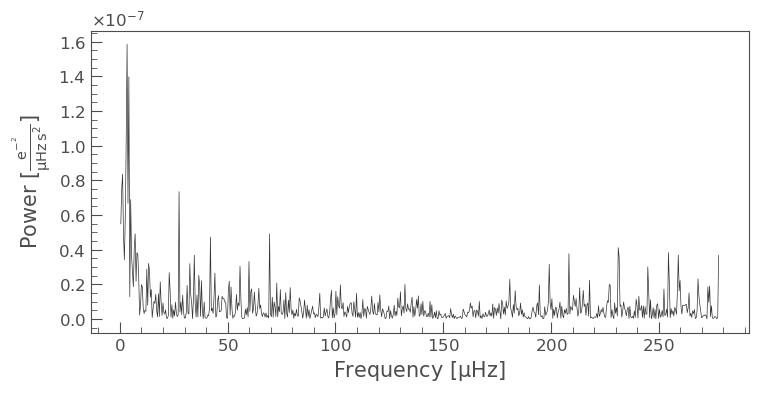

regressors DesignMatrix (1282, 1)


ValueError: DataFrame constructor not properly called!

In [118]:
model1 = lk.TessLightCurve(time1,flux1, quality = quad, cadenceno= cado).remove_nans().remove_outliers().flatten(window_length=145)
model1.scatter()
plt.show()
power1 = model1.to_periodogram(method='lombscargle', normalization="psd")
power1.plot()
plt.show()
#Need to detrend the lightcurve against predicted vectors of systematic noise 
#Linear regression can be a way to estimate the scatter/noise 
#begin with taking the aperture and using the "flux" outside of the aperature and assuming it is noise
#and does not hold true signal flux. 

regressors = flux2
print(regressors)
dmatrix = lk.DesignMatrix(model1, name='regressors')
print(dmatrix)
dmatrix = dmatrix.pca()
corrector = lk.RegressionCorrector(model1)
dmatrix = np.array(dmatrix)
flux2 = np.array(dmatrix)
corrected_lc = corrector.correct(dmatrix, flux2)
corrected_lc.scatter()

"""
dm = lk.DesignMatrix(flux1, name='regressors')
dm = dm.pca()
dm = dm.append_constant()
corrector = lk.RegressionCorrector(model1)
corrector.diagnose()
corrected_lc = corrector.correct(dm, aperture)
corrected_lc.scatter()
"""